## 1. Import the necessary libraries

In [63]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
import pandas as pd
from keras.utils import to_categorical
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import import_ipynb
from data_preprocessing_sa import remove_punctuation,remove_stopword,normalize_numbers,remove_repeated_words
from keras.utils import plot_model
from keras.layers import Embedding
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from pyvi import ViTokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 2 Data preprocessing

>Read CSV

In [64]:
def ReadData(path):
    df=pd.read_csv(path,encoding='utf-8')
    return df['comment'], df['label']

> Execute function

In [65]:
X_train,y_train = ReadData("../data/data_processed/trainprocessed.csv")
X_test,y_test=ReadData("../data/data_processed/testprocesssed.csv")

In [66]:
print(X_test[128])

sản_phẩm sài tạm thích camera pin trâu còn đt sài ko biết bạn nào giống mình ko sài ứng_dụng dể một tối bấm hoài mới cài nhạc chuông điện_thoại hay mất


In [67]:
print(f"X_Train size:{X_train.shape}")
print(f"y_train size {y_train.shape}")

X_Train size:(8898,)
y_train size (8898,)


> word separation

In [68]:
def wordseparation(comment):
    return [review.split() for review in comment]

> Execute function

In [69]:
X_train=wordseparation(X_train)
X_test=wordseparation(X_test)
print(f"X_Train: {X_train[0:2]}")
print(f"X_test: {X_test[0:2]}")

X_Train: [['pin', 'kém', 'còn', 'miễn', 'chê', 'mua', 'number', 'tình_trạng', 'pin', 'còn', 'number', 'ai', 'giống', 'tôi'], ['sao', 'gọi', 'điện_thoại', 'màn_hình', 'chấm', 'nhỏ', 'nháy', 'gần', 'camera', 'vậylúc']]
X_test: [['điện', 'thoải', 'ổn', 'facelock', 'cực', 'nhanh', 'vân', 'tay', 'ôk', 'màn_hình', 'lớn', 'pin', 'trâu', 'liên_quân', 'zalo', 'youtube', 'một', 'ngày', 'mất', 'khoảng', 'number', 'tuy', 'chip', 'number', 'mượt', 'đa_nhiệm', 'khá', 'ổn'], ['mình', 'mới', 'mua', 'vivonumberc', 'tải', 'ứng_dụng', 'games', 'nhanh', 'hài_lòng', 'cài', 'hình', 'nền', 'khóa', 'màn_hình', 'hay', 'mình', 'biết', 'hết', 'chức_năng', 'nó', 'tư_vấn', 'viên', 'nhiệt_tình']]


>Create  Corpus

In [70]:
def CreateCorpus(Vi):
    tokenizer=Tokenizer(oov_token='<oov>')
    tokenizer.fit_on_texts(Vi)
    return tokenizer

> Execute function

In [71]:
X_train_corpus=CreateCorpus(X_train)
X_test_corpus=CreateCorpus(X_test)
print(X_train_corpus.word_index)
print(X_test_corpus.word_index)

{'<oov>': 1, 'number': 2, 'máy': 3, 'mua': 4, 'pin': 5, 'mình': 6, 'dùng': 7, 'mới': 8, 'game': 9, 'tốt': 10, 'chơi': 11, 'ko': 12, 'quá': 13, 'ok': 14, 'đẹp': 15, 'giá': 16, 'mượt': 17, 'nhanh': 18, 'sạc': 19, 'ngày': 20, 'ổn': 21, 'thấy': 22, 'chụp': 23, 'camera': 24, 'còn': 25, 'xài': 26, 'tầm': 27, 'hơn': 28, 'về': 29, 'k': 30, 'màn_hình': 31, 'trâu': 32, 'trong': 33, 'đc': 34, 'hơi': 35, 'sản_phẩm': 36, 'khá': 37, 'lỗi': 38, 'tháng': 39, 'tay': 40, 'nhân_viên': 41, 'sao': 42, 'hay': 43, 'con': 44, 'mọi': 45, 'sử_dụng': 46, 'hình': 47, 'sài': 48, 'hết': 49, 'ngon': 50, 'nói_chung': 51, 'vân': 52, 'nóng': 53, 'nhiệt_tình': 54, 'thứ': 55, 'lắm': 56, 'nghe': 57, 'nó': 58, 'luôn': 59, 'loa': 60, 'điện_thoại': 61, 'khác': 62, 'wifi': 63, 'lag': 64, 'ảnh': 65, 'tệ': 66, 'người': 67, 'xem': 68, 'biết': 69, 'mấy': 70, 'ở': 71, 'nào': 72, 'cấu_hình': 73, 'dc': 74, 'bạn': 75, 'lần': 76, 'đổi': 77, 'nói': 78, 'hàng': 79, 'cả': 80, 'sáng': 81, 'tôi': 82, 'đến': 83, 'tuần': 84, 'đt': 85, 'chạy'

In [72]:
print(f"Total Word in Corpus of train: ({len(X_train_corpus.word_index)})")
print(f"Total Word in Corpus of test: ({len(X_test_corpus.word_index)})")

Total Word in Corpus of train: (11339)
Total Word in Corpus of test: (4850)


> longest sentence in the training set, longest sentence in the test set

In [73]:
max_sentence_Xtrain= max([len(i) for i in  (X_train)])
print(f"max_sentence_Xtrain:{max_sentence_Xtrain} word")
max_sentence_Xtest=max([len(i) for i in (X_test)])
print(f"max_sentence_Xtest:{max_sentence_Xtest} word")

max_sentence_Xtrain:128 word
max_sentence_Xtest:131 word


> Generate input training data by converting words to indexes and performing padding to bring into the model

In [74]:
def Padding(Vi):
    vi_sequence=X_train_corpus.texts_to_sequences(Vi)
    vi_sequence=pad_sequences(vi_sequence,maxlen=max_sentence_Xtest,padding='pre')
    return vi_sequence

> Execute Function

In [75]:
X_train=Padding(X_train)
X_test=Padding(X_test)
print(X_train[0])
print(X_test[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    5   91   25 1324  130    4    2  373    5
   25    2  116  346   82]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0

>Convert labels to numbers

In [76]:
label_encoder=LabelEncoder()
# Mã hóa các nhãn văn bản thành các giá trị số
y_train_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.transform(y_test)
print(y_train_encoded[0:3])

[1 0 1]


>Convert number to one_hot_vector

In [77]:
y_train_one_hot=to_categorical(y_train_encoded)
print(y_train_one_hot[0:3])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


## 3.Built Model LSTM

### 3.1. Design configuration for LSTM network

In [78]:
dropout=0.3
total_word=len(X_train_corpus.word_index)
num_classes=3
embedding_size = 128
num_lstm_units = 20
epochs=60

### 3.2. Model LSTM

In [79]:
model = Sequential()
model.add(Embedding(total_word, embedding_size, name='embedding_layer'))
model.add(LSTM(num_lstm_units, return_sequences=True,name='LSTM_layer_1'))
model.add(Dropout(dropout,name='Dropout_layer_1'))
model.add(LSTM(num_lstm_units,name='LSTM_layer_2'))
model.add(Dense(num_classes, activation='softmax'))

### 3.3. Hyperparameter

In [80]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


### 3.4. Train

 >Monitor the trainning process to stop earlier

In [81]:
# Khởi tạo callback EarlyStopping
early_stopping_callback = EarlyStopping(
    monitor='loss', 
    patience=8,          
    restore_best_weights=True  
)

In [82]:
model.fit(X_train, 
          y_train_one_hot, 
          verbose=1, epochs=epochs,
          batch_size=64,
          callbacks=[early_stopping_callback] )

Epoch 1/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.6325 - loss: 0.8437
Epoch 2/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.8253 - loss: 0.4796
Epoch 3/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.8599 - loss: 0.3740
Epoch 4/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.8944 - loss: 0.2841
Epoch 5/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9153 - loss: 0.2366
Epoch 6/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.9378 - loss: 0.1892
Epoch 7/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9453 - loss: 0.1736
Epoch 8/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9576 - loss: 0.1364
Epoch 9/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.9621 - loss: 0.1230
Epoch 10/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.9675 - loss: 0.1026
Epoch 11/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.9783 - loss: 0.0809
Epoch 12/60
140/140 ━━━━━━━━━━━━

>Network Architecture

In [83]:
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_layer (Embedding)     │ (None, 131, 128)       │     1,451,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_layer_1 (LSTM)             │ (None, 131, 20)        │        11,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_layer_1 (Dropout)       │ (None, 131, 20)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_layer_2 (LSTM)             │ (None, 20)             │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,399,967 (16.78 MB)

 Trainable params: 1,466,655 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,933,312 (11.19 MB)

None


> Network Architecture Diagram

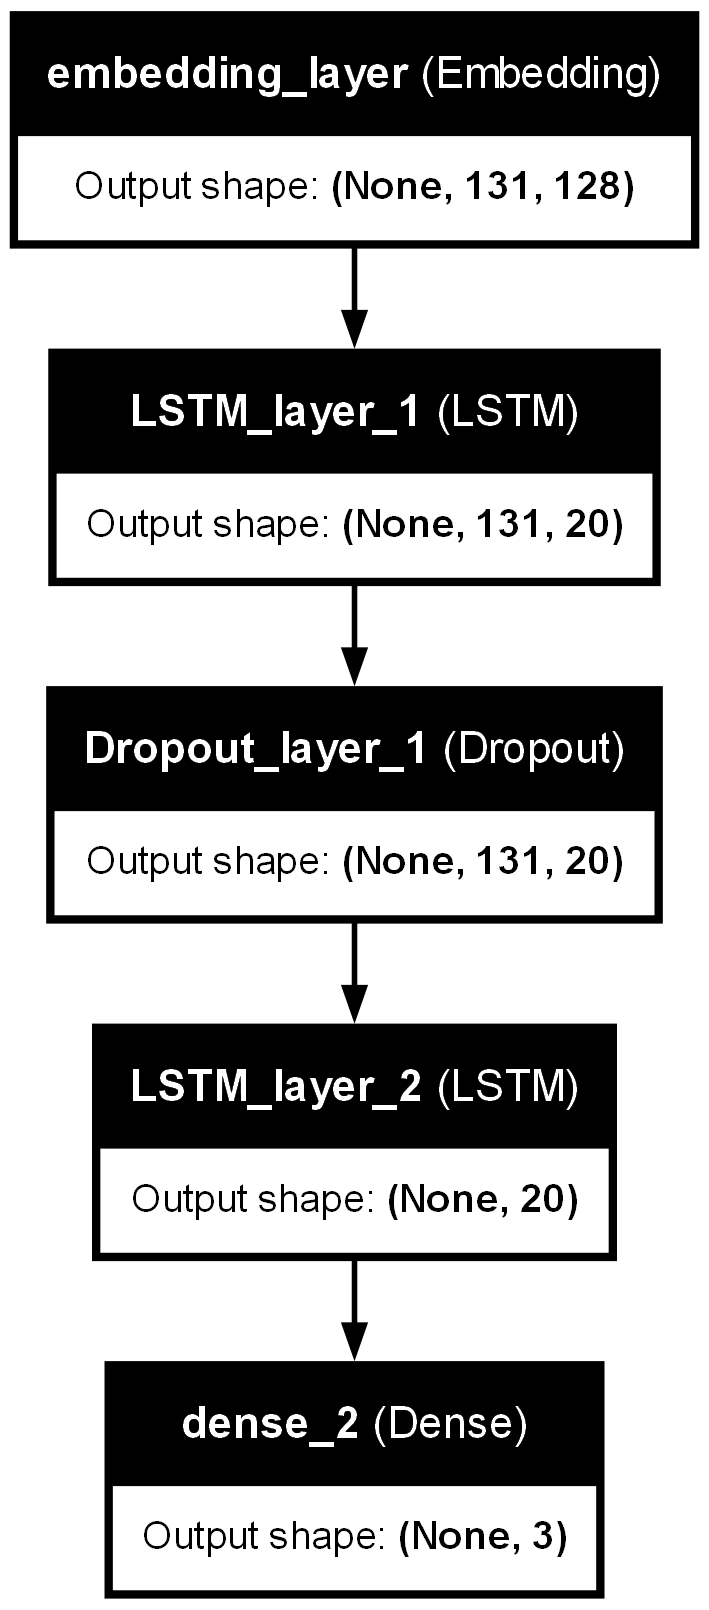

In [84]:
# Tạo đồ thị cho mô hình
plot_model(model, to_file='../design/model_LSTM__sentiment_plot.png', show_shapes=True, show_layer_names=True)

> Dump file models_sentiment.h5

In [85]:
model.save('../model/model_sentiment_lstm.h5')

### 3.5 Evaluation test dataset

> Load file model_sentiment_lstm.h5

In [86]:
model_sentiment=load_model("../model/model_sentiment_lstm.h5")

> Get the weight of the embedding layer

In [87]:
weights = model_sentiment.layers[0].get_weights()[0]

# Giảm chiều dữ liệu sử dụng t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(weights)
print(embeddings_2d[0:2])

[[  0.22098032  31.803988  ]
 [ -8.030024   -10.89766   ]]


> Visualize the context and semantic correlation of words

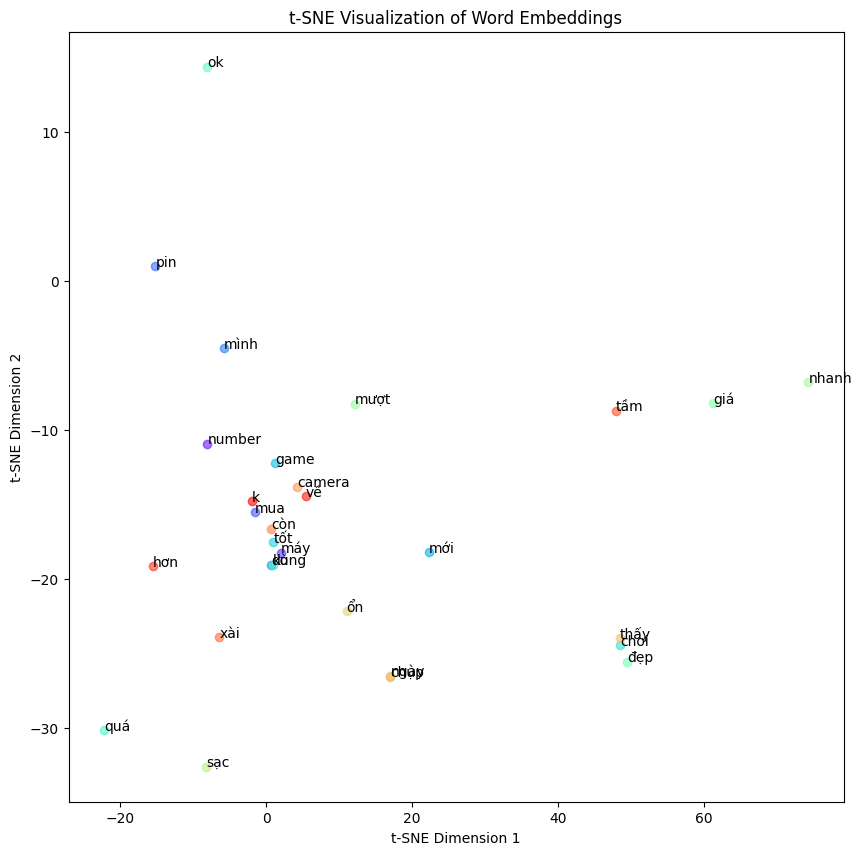

In [88]:
# Vẽ trực quan hóa với nhãn từ
# Màu cho mỗi từ
colors = plt.cm.rainbow(np.linspace(0, 1, 30))
plt.figure(figsize=(10, 10))
for i in range(1,30):  
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], marker='o', color=colors[i], alpha=0.6)
    plt.annotate(X_train_corpus.index_word[i+1], (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings')
plt.show()


> predict  test dataset 

In [89]:
result = model_sentiment.predict(X_test)


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step


In [90]:
predict_labels = np.argmax(result,axis=1)
print(predict_labels[125:150])
# Decode the predicted labels
predicted_labels_decoded = label_encoder.inverse_transform(predict_labels)
print(predicted_labels_decoded[125:150])

[2 0 2 0 0 2 2 1 0 0 2 0 1 2 0 2 2 0 0 2 2 2 2 2 2]
['Positive' 'Negative' 'Positive' 'Negative' 'Negative' 'Positive'
 'Positive' 'Neutral' 'Negative' 'Negative' 'Positive' 'Negative'
 'Neutral' 'Positive' 'Negative' 'Positive' 'Positive' 'Negative'
 'Negative' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive']


> Data Preprocessing sample

In [94]:
def Proprocessing(comment):
    comment= remove_punctuation(comment.lower())
    comment=normalize_numbers(comment)
    comment= remove_stopword(comment)
    comment= ViTokenizer.tokenize(comment)
    comment= [remove_repeated_words(comment)]
    comment= wordseparation(comment)
    comment=Padding(comment)
    return comment

> Predict one a new sample

In [95]:
comment="Sản phẩm Sài cũng tạm thích cái camera và pin trâu. Còn đt đang sài ko biết có bạn nào giống mình ko lúc Sài ứng dụng nhưng dể một lúc thì tối  bấm hoài không lên. Để lúc mới lên  cài nhạc chuông cho điện thoại hay bị mất"
comment_processed=Proprocessing(comment)
result_one=model_sentiment.predict(comment_processed)
predict_a_label=np.argmax(result_one,axis=1)
print(predict_a_label)
print(label_encoder.inverse_transform(predict_a_label))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
[0]
['Negative']


> Evaluate the model through Accuracy measures,Precision,Recall,F1-score,

In [93]:
accuracy = accuracy_score(y_test_encoded, predict_labels)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(y_test_encoded, predict_labels, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test_encoded, predict_labels, average='weighted')
print(f"Recall: {recall:.4f}")

f1score = f1_score(y_test_encoded, predict_labels, average='weighted')
print(f"F1-score: {f1score}")

Accuracy: 0.7914
Precision: 0.7894
Recall: 0.7914
F1-score: 0.7903345475755124
